In [1003]:
import warnings
warnings.filterwarnings('ignore')

## Data understanding and exploration

In [1004]:
import pandas as pd

In [1005]:
dataset = pd.read_csv("bike_sharing_data.csv")

In [1006]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1007]:
dataset.shape


(730, 16)

In [1008]:
dataset.columns 

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [1009]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1010]:

dataset.loc[(dataset['season'] == 1), 'season'] = "Spring" 

dataset.loc[(dataset['season'] == 2), 'season'] = "Summer" 

dataset.loc[(dataset['season'] == 3), 'season'] = "Fall" 

dataset.loc[(dataset['season'] == 4), 'season'] = "Winter" 



In [1011]:
dataset["season"].astype('category').value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [1012]:
dataset['yr'].astype('category').value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [1013]:
def object_map_months(x):
    return x.map({1: 'jan', 2:'feb', 3:'mar',4:'apr', 5:'may',6:'jun', 7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

dataset['mnth'] = object_map_months(dataset['mnth'])

In [1014]:
dataset['mnth'].astype('category').value_counts()

mnth
aug    62
dec    62
jul    62
jan    62
oct    62
may    62
mar    62
apr    60
nov    60
jun    60
sep    60
feb    56
Name: count, dtype: int64

In [1015]:
dataset['holiday'].astype('category').value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [1016]:
def object_map_weekday(x):
    return x.map({1: 'mon', 2:'tue', 3:'wed',4:'thu', 5:'fri',6:'sat', 0:'sun'})

In [1017]:
dataset[['weekday']] = dataset[['weekday']].apply(object_map_weekday)

In [1018]:
dataset['weekday'].astype('category').value_counts()

weekday
mon    105
sat    105
sun    105
fri    104
thu    104
tue    104
wed    103
Name: count, dtype: int64

In [1019]:
dataset['workingday'].astype('category').value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [1020]:
dataset['weathersit'].astype('category').value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

## Data Visualization

In [1021]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<Axes: xlabel='temp', ylabel='Density'>

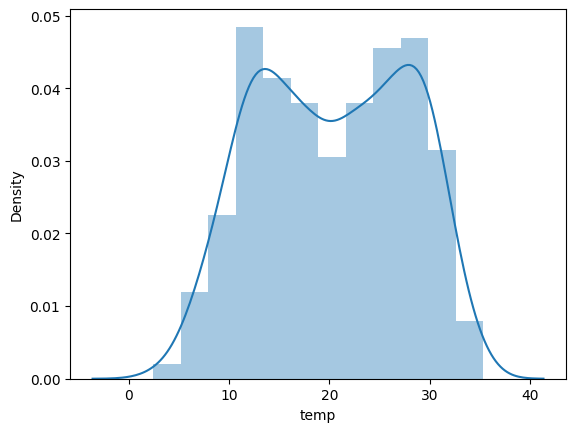

In [1022]:
# temprature
sns.distplot(dataset['temp'])


<Axes: xlabel='atemp', ylabel='Density'>

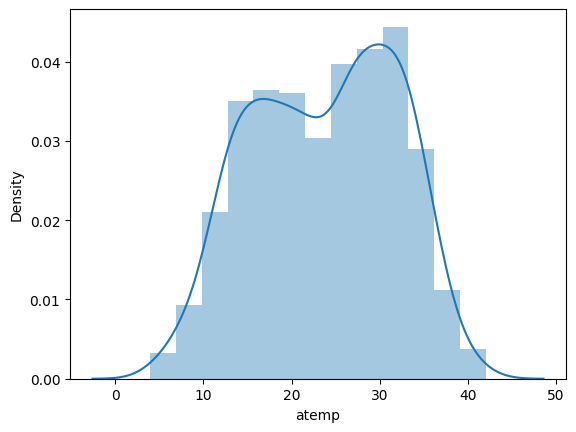

In [1023]:
#Actual Temp
sns.distplot(dataset['atemp'])

<Axes: xlabel='windspeed', ylabel='Density'>

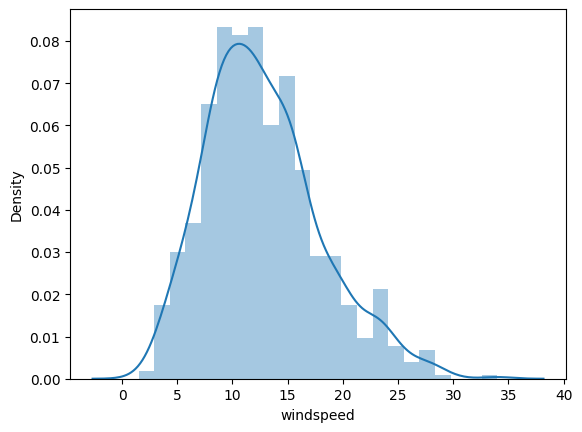

In [1024]:
#wind speed
sns.distplot(dataset['windspeed'])

<Axes: xlabel='cnt', ylabel='Density'>

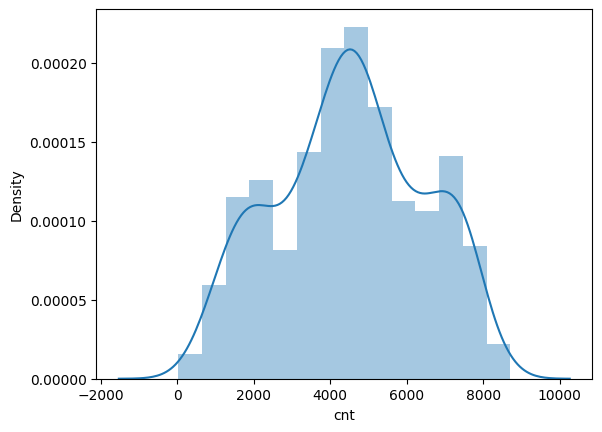

In [1025]:
# Target Variable : cont of total rental bikes including both casual and registered
sns.distplot(dataset['cnt'])

In [1026]:
#Converting date to datetime format
dataset['dteday'] = dataset['dteday'].astype('datetime64[s]')

In [1027]:
dataset_categorical = dataset.select_dtypes(exclude = ['float64', 'datetime64','int64'])

In [1028]:
dataset_categorical.columns

Index(['season', 'mnth', 'weekday'], dtype='object')

In [1029]:
dataset_categorical

,season,mnth,weekday
0,Spring,jan,sat
1,Spring,jan,sun
2,Spring,jan,mon
3,Spring,jan,tue
4,Spring,jan,wed
...,...,...,...
725,Spring,dec,thu
726,Spring,dec,fri
727,Spring,dec,sat
728,Spring,dec,sun


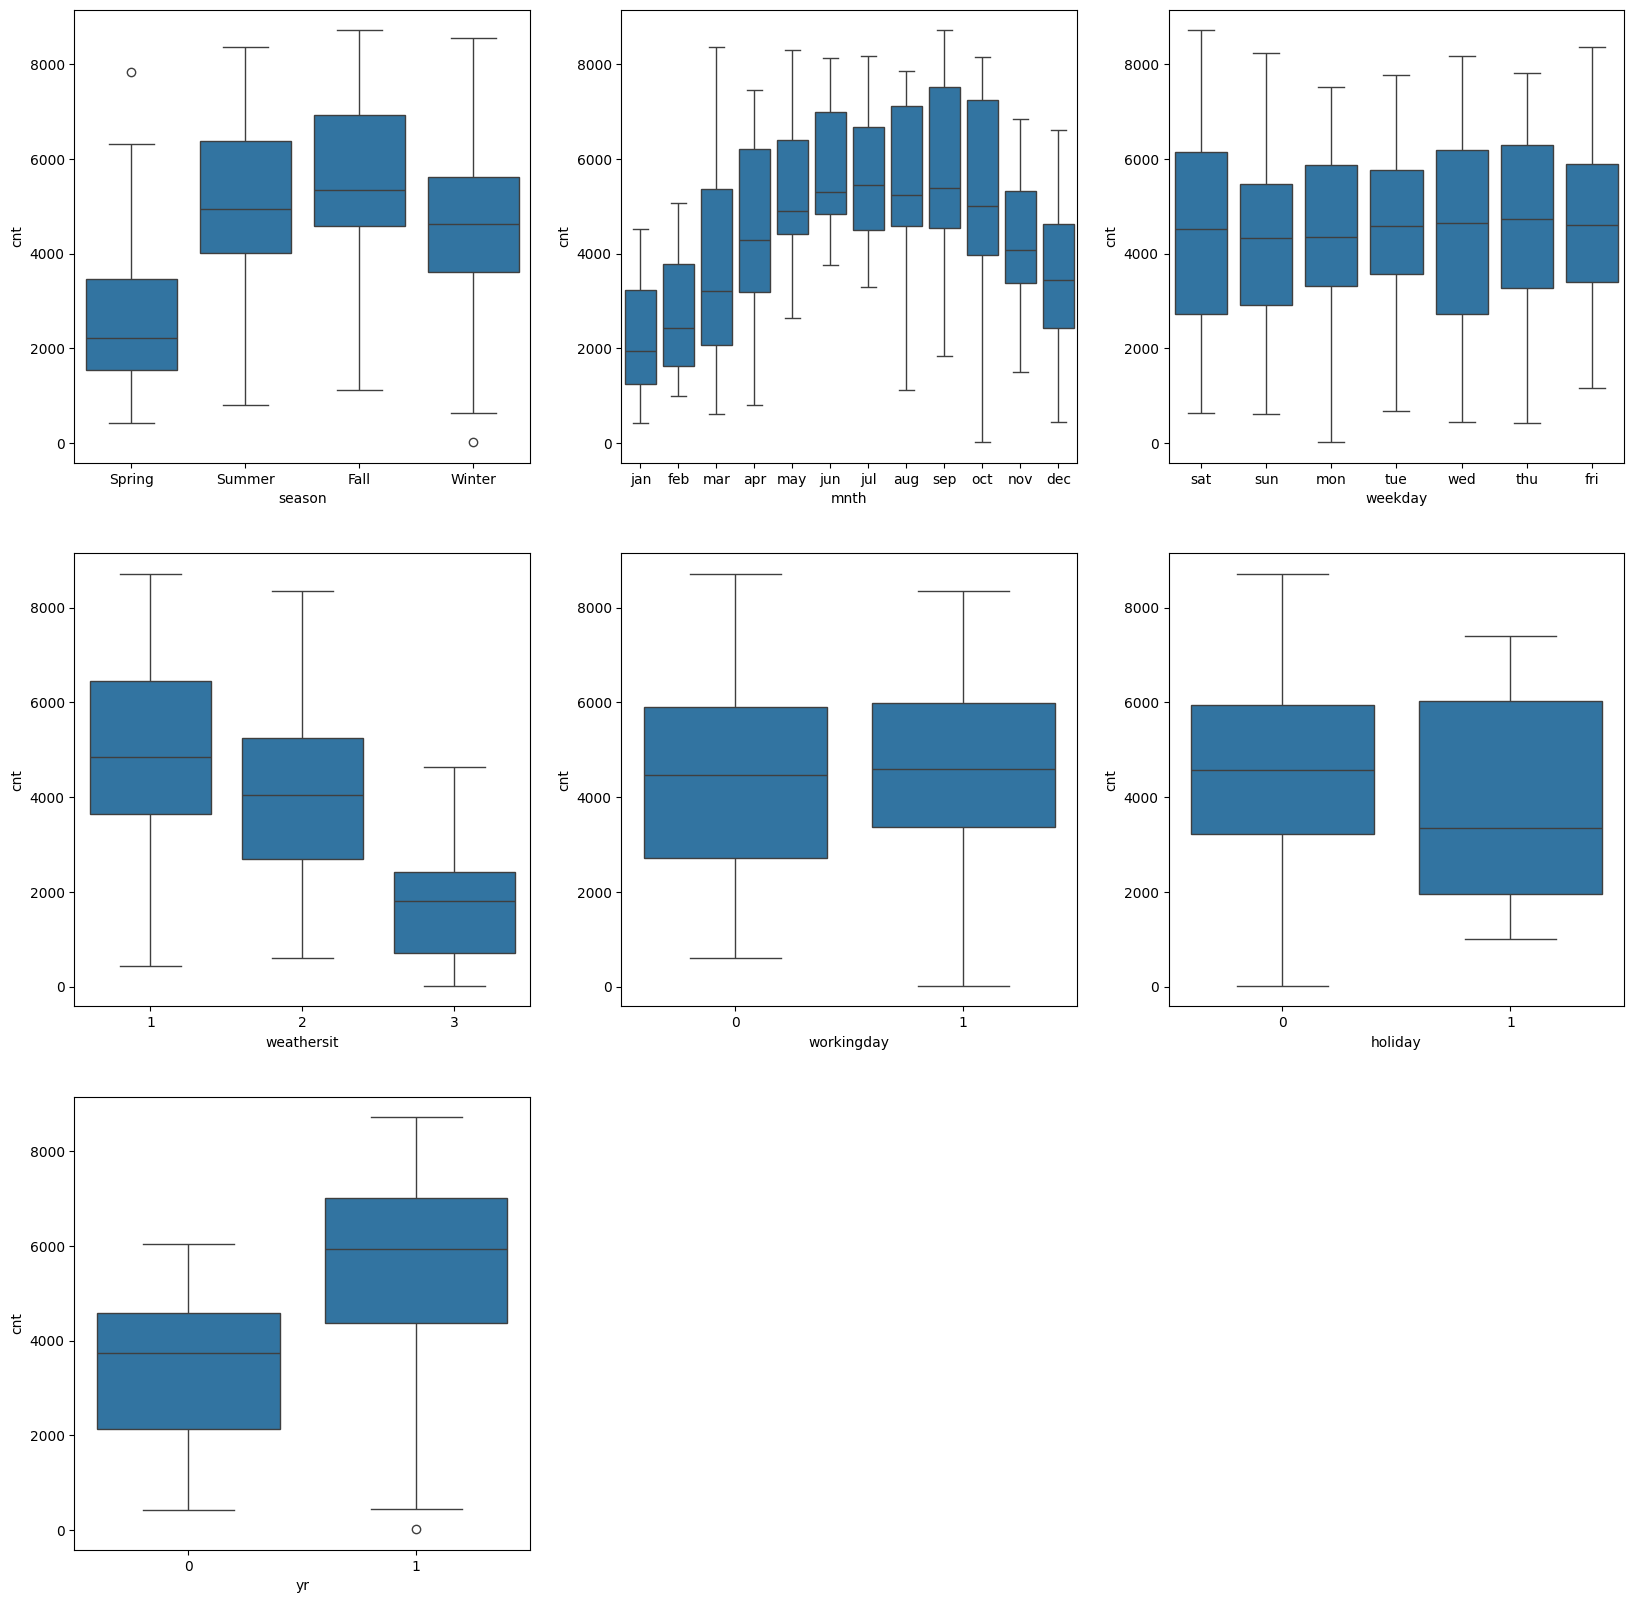

In [1030]:
plt.figure(figsize= (20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = dataset)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = dataset)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = dataset)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = dataset)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = dataset)
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = dataset)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = dataset)
plt.show()

In [1031]:
intVarlist = ["casual","registered","cnt"]

for i in intVarlist:
    dataset[i] = dataset[i].astype('float')

In [1032]:
dataset_numeric = dataset.select_dtypes(include = ['float64'])
dataset_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


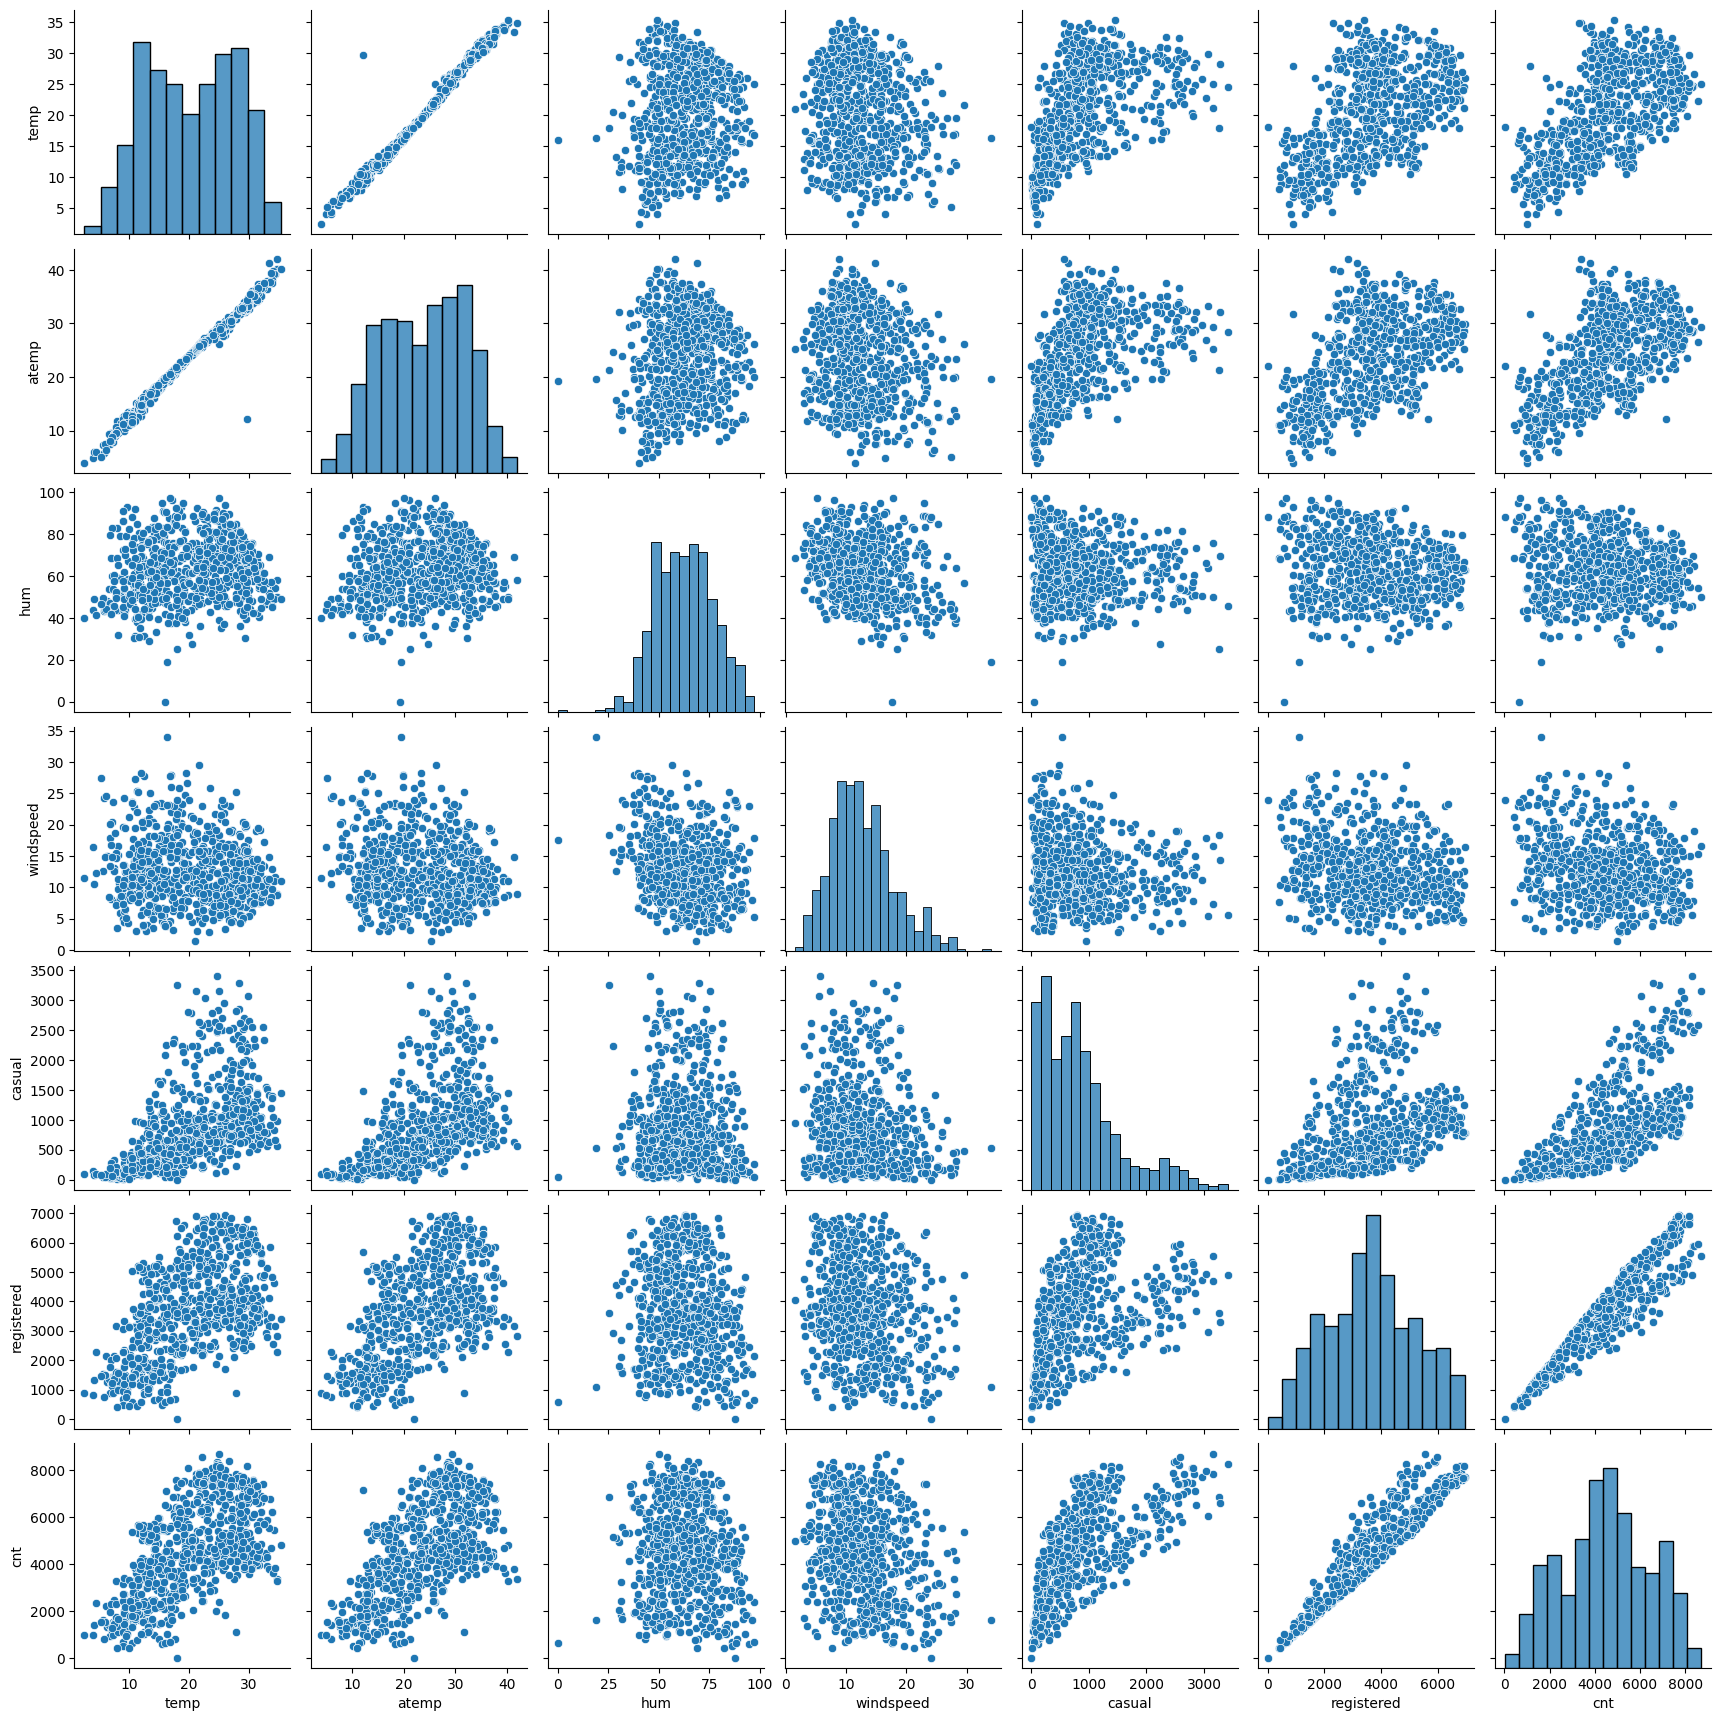

In [1033]:
sns.pairplot(dataset_numeric)

In [1034]:
corr = dataset_numeric.corr()
corr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

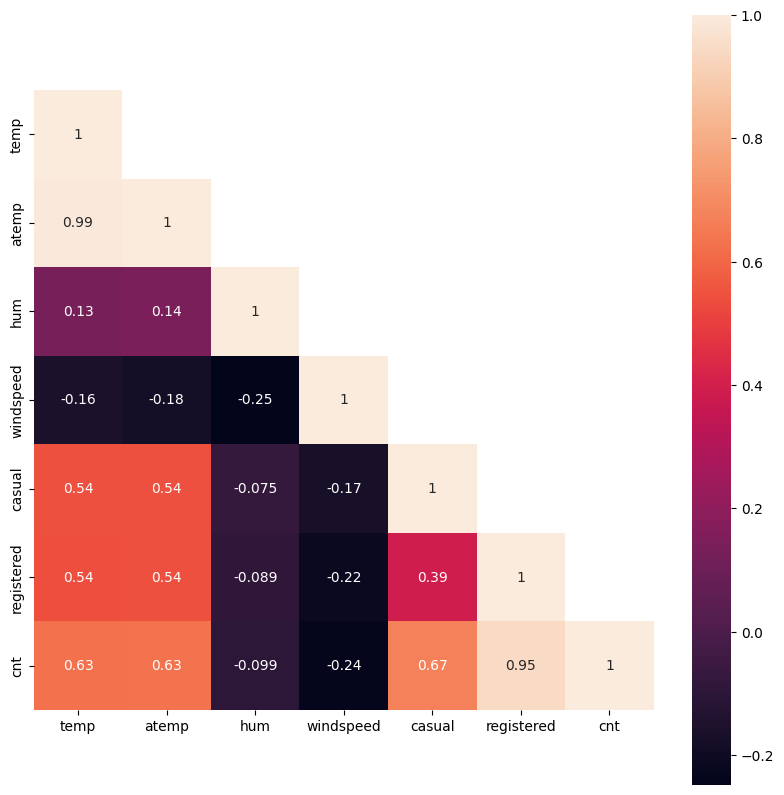

In [1035]:
#HEAT MAP
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corr,mask = mask,vmax = 1,square = True , annot = True)

In [1036]:
#dropping of atemp as it is highly correlated with temperature itself
dataset.drop('atemp',axis =1 ,inplace=True)
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Spring,0,jan,0,sat,0,2,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,Spring,0,jan,0,sun,0,2,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,Spring,0,jan,0,mon,1,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,Spring,0,jan,0,tue,1,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,Spring,0,jan,0,wed,1,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


## Data preparation

In [1037]:
dataset_categorical = dataset.select_dtypes(include = ['object'])

In [1038]:
dataset_categorical.head()

,season,mnth,weekday
0,Spring,jan,sat
1,Spring,jan,sun
2,Spring,jan,mon
3,Spring,jan,tue
4,Spring,jan,wed


In [1039]:
dataset_dummies = pd.get_dummies(dataset_categorical,drop_first=True,dtype=int)
dataset_dummies.head()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [1040]:
# Drop categorical ones
dataset = dataset.drop(list(dataset_categorical.columns),axis = 1)
dataset.head()

,instant,dteday,yr,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,0,2,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,0,0,0,2,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,0,0,1,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,0,0,1,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,0,0,1,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


In [1041]:
#adding dummies now(concatinate)
dataset= pd.concat([dataset , dataset_dummies], axis = 1)
dataset.head()


,instant,dteday,yr,holiday,workingday,weathersit,temp,hum,windspeed,casual,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,1,2018-01-01,0,0,0,2,14.110847,80.5833,10.749882,331.0,...,0,0,0,0,0,1,0,0,0,0
1,2,2018-02-01,0,0,0,2,14.902598,69.6087,16.652113,131.0,...,0,0,0,0,0,0,1,0,0,0
2,3,2018-03-01,0,0,1,1,8.050924,43.7273,16.636703,120.0,...,0,0,0,0,1,0,0,0,0,0
3,4,2018-04-01,0,0,1,1,8.200000,59.0435,10.739832,108.0,...,0,0,0,0,0,0,0,0,1,0
4,5,2018-05-01,0,0,1,1,9.305237,43.6957,12.522300,82.0,...,0,0,0,0,0,0,0,0,0,1


In [1042]:
#dropping the date and the instant
dataset = dataset.drop(['instant', 'dteday'],axis = 1 , inplace = False)
dataset.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,0,0,0,2,14.110847,80.5833,10.749882,331.0,654.0,985.0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,2,14.902598,69.6087,16.652113,131.0,670.0,801.0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,...,0,0,0,0,0,0,0,0,0,1


 ## Model Building And Evaluation


In [1043]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [1044]:
# train test split
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test = train_test_split(dataset , train_size=0.7,test_size=0.3,random_state=100)

In [1045]:
df_train

,yr,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
653,1,0,1,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,2,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,1,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,2,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,2,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,...,0,0,0,0,1,0,0,0,0,0
578,1,0,1,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,...,0,0,0,0,0,0,0,1,0,0
53,0,0,1,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,...,0,0,0,0,0,0,0,0,0,1
350,0,0,0,2,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,...,0,0,0,0,0,1,0,0,0,0


In [1046]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [1047]:
#Applly scalar to all columns except dummy variables
var = ['temp','hum','windspeed','casual','registered','cnt']
df_train[var] = scaler.fit_transform(df_train[var])

In [1048]:
df_train.describe()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,1.401961,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.547540,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,2.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


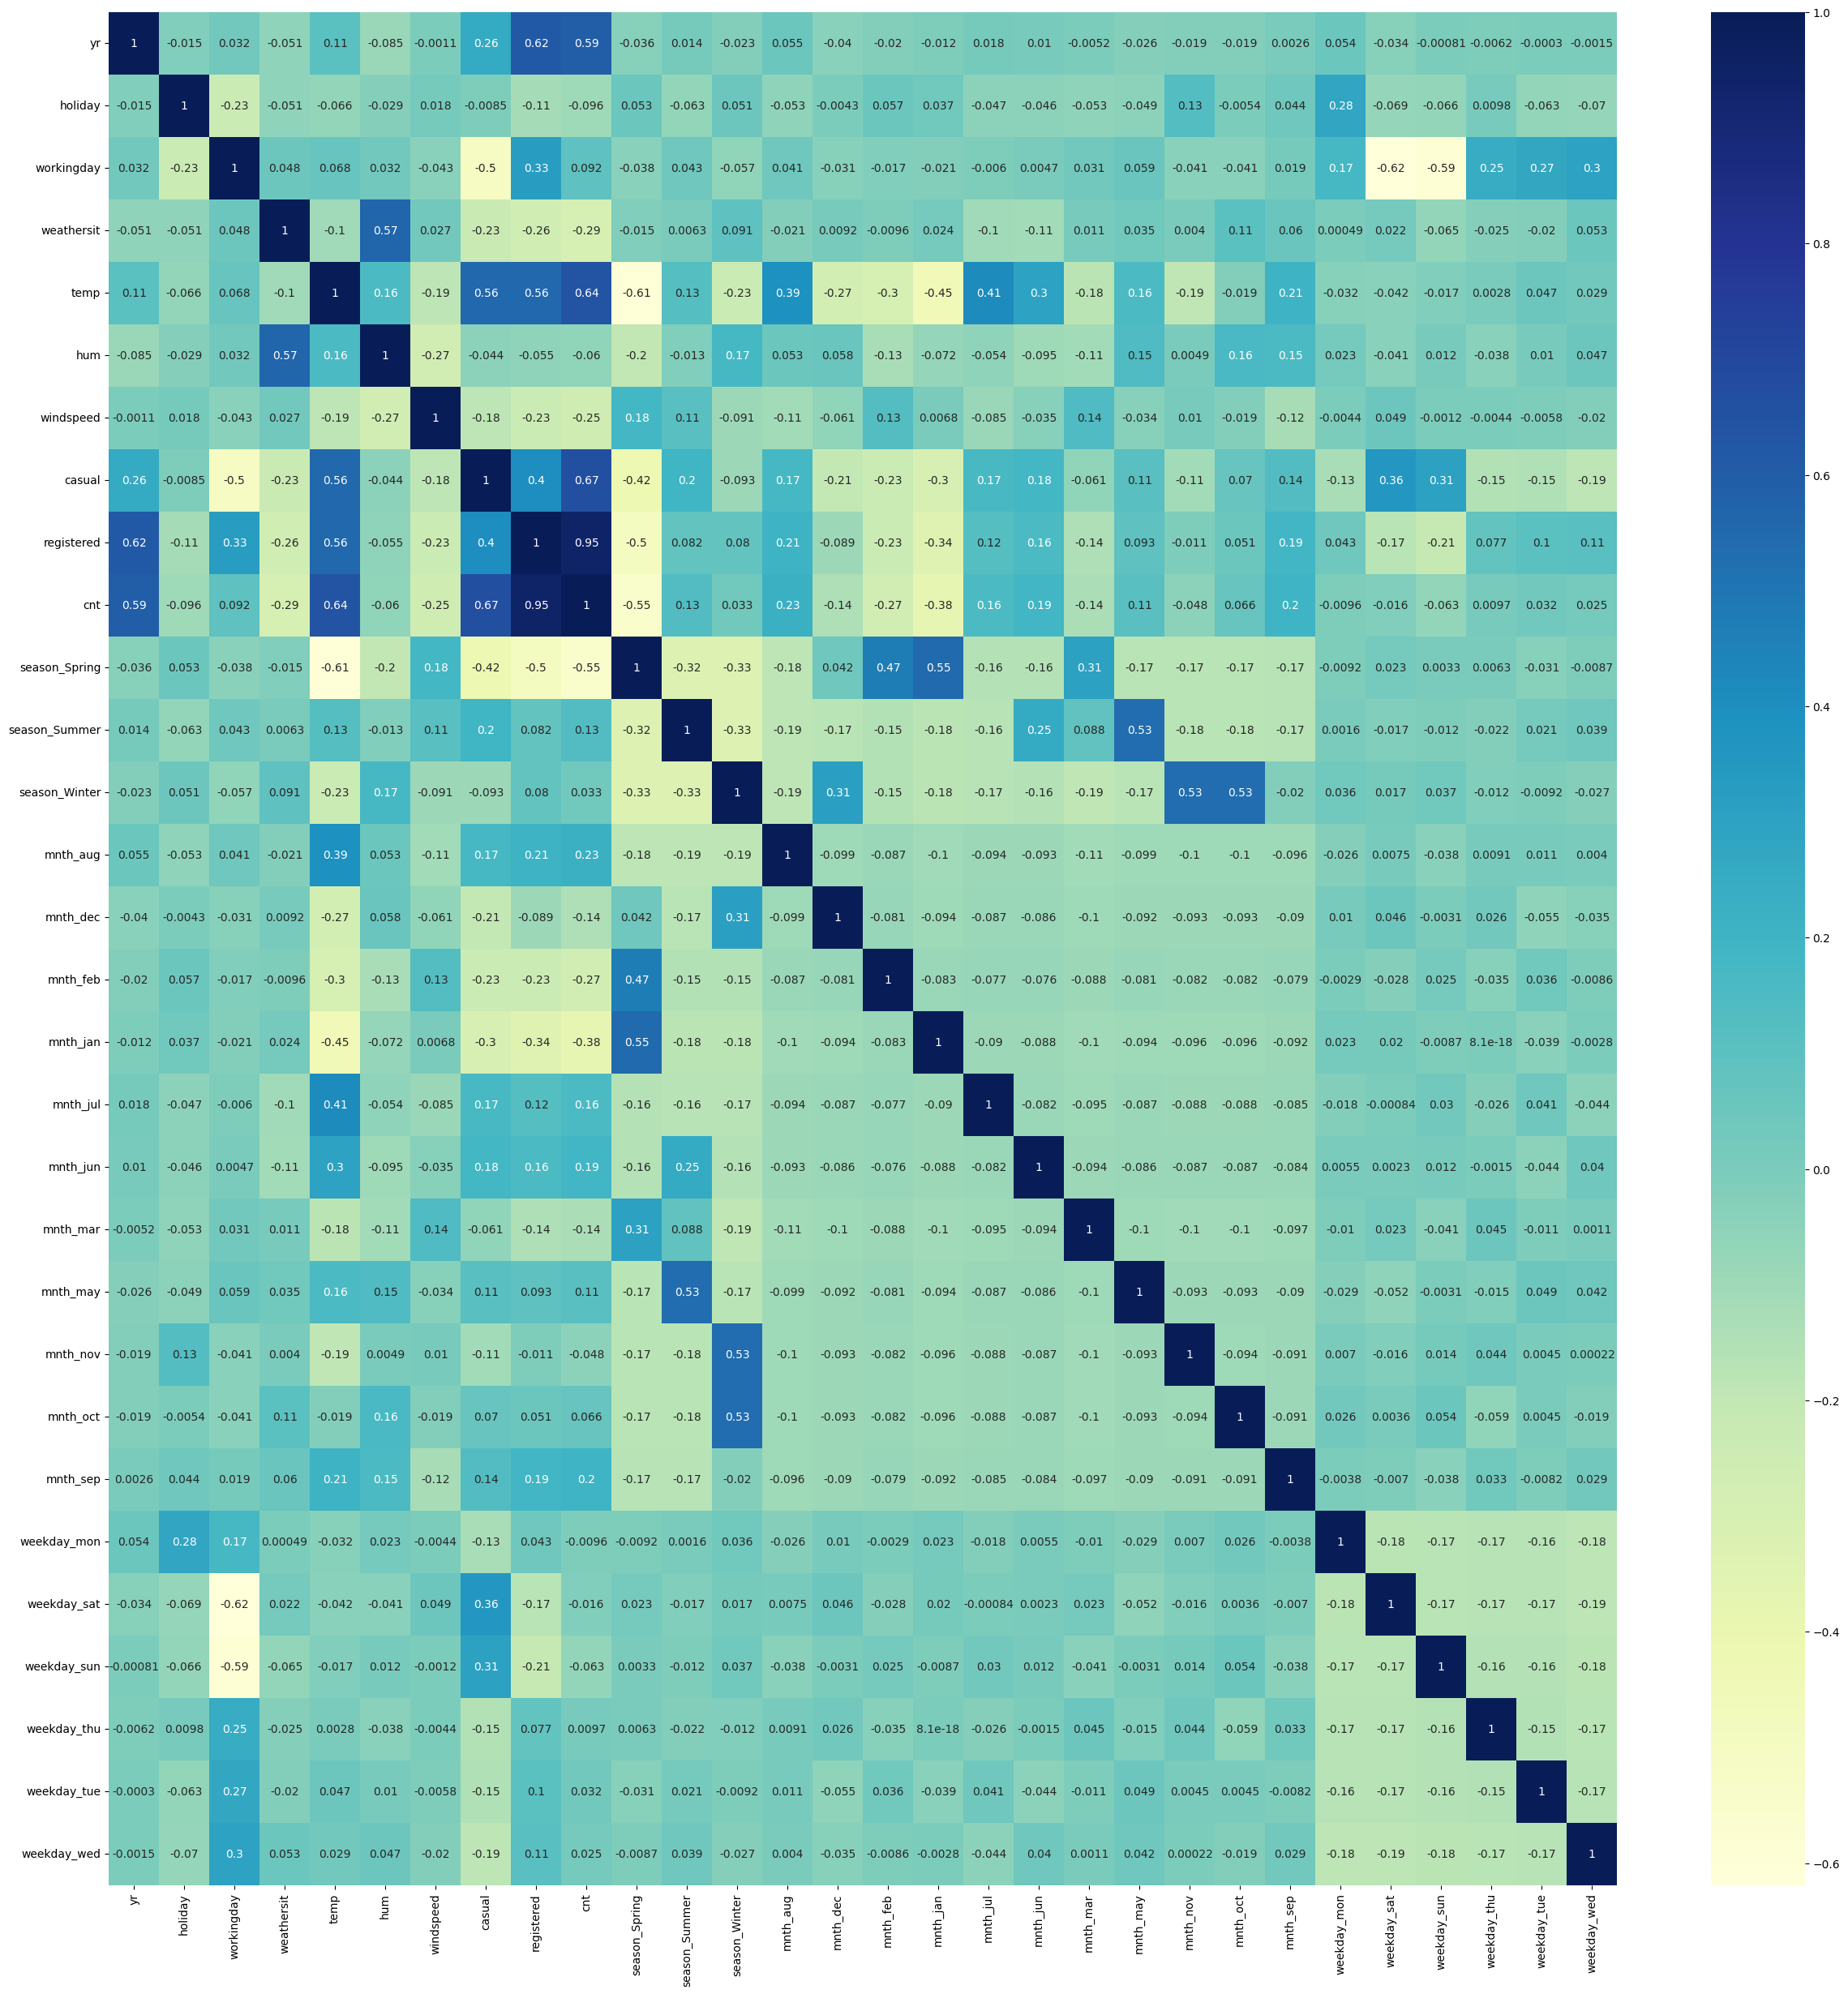

In [1049]:
#checking the correlation to see which variables are highly correlated and dropped
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(), annot = True,cmap='YlGnBu')
plt.show()

In [1050]:
#dividing into X and Y
y_train = df_train.pop("cnt")
x_train = df_train.drop(["casual", "registered"], axis = 1)
x_train.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
653,1,0,1,1,0.509887,0.575354,0.300794,0,0,1,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,1,0.815169,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,2,0.442393,0.640189,0.255342,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,1,0.245101,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,2,0.395666,0.504508,0.188475,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [1051]:
np.array(x_train)

array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], shape=(510, 27))

In [1052]:
import statsmodels.api as sm

x_train_ln =sm.add_constant(x_train)

lr = sm.OLS(y_train,x_train_ln).fit()
x_train_ln

,const,yr,holiday,workingday,weathersit,temp,hum,windspeed,season_Spring,season_Summer,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
653,1.0,1,0,1,1,0.509887,0.575354,0.300794,0,0,...,0,0,1,0,0,0,0,0,1,0
576,1.0,1,0,1,1,0.815169,0.725633,0.264686,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1.0,1,0,0,2,0.442393,0.640189,0.255342,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1.0,1,0,0,1,0.245101,0.498067,0.663106,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1.0,1,0,0,2,0.395666,0.504508,0.188475,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,1,2,0.824514,0.605840,0.355596,0,1,...,0,0,0,0,1,0,0,0,0,0
578,1.0,1,0,1,1,0.863973,0.679690,0.187140,0,0,...,0,0,0,0,0,0,0,1,0,0
53,1.0,0,0,1,1,0.202618,0.435939,0.111379,1,0,...,0,0,0,0,0,0,0,0,0,1
350,1.0,0,0,0,2,0.248216,0.577930,0.431816,0,0,...,0,0,0,0,0,1,0,0,0,0


In [1053]:
lr.params

const            0.312773
yr               0.233942
holiday          0.029843
workingday       0.115932
weathersit      -0.083566
temp             0.447107
hum             -0.141324
windspeed       -0.195175
season_Spring   -0.042653
season_Summer    0.043787
season_Winter    0.109622
mnth_aug         0.021473
mnth_dec        -0.045920
mnth_feb        -0.034028
mnth_jan        -0.060125
mnth_jul        -0.039903
mnth_jun        -0.001692
mnth_mar        -0.000437
mnth_may         0.027824
mnth_nov        -0.043774
mnth_oct        -0.000549
mnth_sep         0.083470
weekday_mon     -0.025415
weekday_sat      0.110369
weekday_sun      0.056629
weekday_thu     -0.016878
weekday_tue     -0.022294
weekday_wed     -0.013585
dtype: float64

In [1054]:
lm = LinearRegression()

lm.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [1055]:
print(lm.coef_)
print(lm.intercept_)

[ 2.33941738e-01 -4.83501692e-02  3.77382630e-02 -8.35664972e-02
  4.47107444e-01 -1.41323782e-01 -1.95175156e-01 -4.26534244e-02
  4.37872884e-02  1.09621819e-01  2.14730192e-02 -4.59200090e-02
 -3.40282576e-02 -6.01245725e-02 -3.99032690e-02 -1.69155053e-03
 -4.37138299e-04  2.78243353e-02 -4.37739483e-02 -5.48625484e-04
  8.34702171e-02 -2.54151467e-02  3.21761384e-02 -2.15642322e-02
 -1.68775243e-02 -2.22940611e-02 -1.35851612e-02]
0.3909662265182455


In [1056]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     102.1
Date:                Tue, 21 Oct 2025   Prob (F-statistic):          8.42e-178
Time:                        12:35:40   Log-Likelihood:                 515.68
No. Observations:                 510   AIC:                            -977.4
Df Residuals:                     483   BIC:                            -863.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3128      0.036      8.772      0.000       0.243       0.383
yr                0.2339      0.008     28.416      0.000       0.218       0.250
holiday           0.0298      0.024      1.219      0.224      -0.018       0.078
workingday        0.1159      0.013      9.222      0.000       0.091       0.141
weathersit       -0.0836      0.010     -8.728      0.000      -0.102      -0.065
temp              0.4471      0.047      9.441      0.000       0.354       0.540
hum              -0.1413      0.039     -3.594      0.000      -0.219      -0.064
windspeed        -0.1952      0.026     -7.441      0.000      -0.247      -0.144
season_Spring    -0.0427      0.031     -1.392      0.165      -0.103       0.018
season_Summer     0.0438      0.027      1.634      0.103      -0.009       0.096
season_Winter     0.1096      0.029      3.841      0.000       0.054       0.166
mnth_aug          0.0215      0.034      0.624      0.533      -0.046       0.089
mnth_dec         -0.0459      0.034     -1.337      0.182      -0.113       0.022
mnth_feb         -0.0340      0.034     -1.011      0.312      -0.100       0.032
mnth_jan         -0.0601      0.034     -1.753      0.080      -0.128       0.007
mnth_jul         -0.0399      0.036     -1.112      0.267      -0.110       0.031
mnth_jun         -0.0017      0.026     -0.066      0.947      -0.052       0.049
mnth_mar         -0.0004      0.025     -0.017      0.986      -0.050       0.049
mnth_may          0.0278      0.021      1.296      0.196      -0.014       0.070
mnth_nov         -0.0438      0.037     -1.177      0.240      -0.117       0.029
mnth_oct         -0.0005      0.037     -0.015      0.988      -0.072       0.071
mnth_sep          0.0835      0.033      2.550      0.011       0.019       0.148
weekday_mon      -0.0254      0.016     -1.625      0.105      -0.056       0.005
weekday_sat       0.1104      0.014      7.870      0.000       0.083       0.138
weekday_sun       0.0566      0.014      4.029      0.000       0.029       0.084
weekday_thu      -0.0169      0.016     -1.069      0.286      -0.048       0.014
weekday_tue      -0.0223      0.016     -1.408      0.160      -0.053       0.009
weekday_wed      -0.0136      0.015     -0.897      0.370      -0.043       0.016
==============================================================================
Omnibus:                       85.350   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.478
Skew:                          -0.787   Prob(JB):                     2.03e-56
Kurtosis:                       6.097   Cond. No.                     1.15e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of th

In [1057]:
# import rfe 
from sklearn.feature_selection import RFE

In [1058]:
lm = LinearRegression()
rfe1 = RFE(estimator=lm,n_features_to_select= 15) # this model do not take positional element by default
#fit with 15 features
rfe1.fit(x_train, y_train)
print(rfe1.support_)
print (rfe1.ranking_)

[ True  True  True  True  True  True  True  True False  True False  True
 False  True  True False False False  True False  True False  True False
 False False False]
[ 1  1  1  1  1  1  1  1  4  1  5  1  3  1  1 11 13  2  1 12  1  7  1  6
  9  8 10]


In [1059]:
col1 = x_train.columns[rfe1.support_]

In [1060]:
col1

Index(['yr', 'holiday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_dec', 'mnth_jan', 'mnth_jul',
       'mnth_nov', 'mnth_sep', 'weekday_sat'],
      dtype='object')

In [1061]:
x_train_rfe1 = x_train[col1]
x_train_lm1 = sm.add_constant(x_train_rfe1)
lm1 = sm.OLS(y_train, x_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              943.6
Date:                Tue, 21 Oct 2025   Prob (F-statistic):                        0.00
Time:                        12:35:40   Log-Likelihood:                          435.44
No. Observations:                 510   AIC:                                     -840.9
Df Residuals:                     495   BIC:                                     -777.4
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
yr                0.2457      0.009     26.280      0.000       0.227       0.264
holiday          -0.0110      0.032     -0.349      0.728      -0.073       0.051
workingday        0.0885      0.013      6.825      0.000       0.063       0.114
weathersit       -0.0844      0.011     -7.675      0.000      -0.106      -0.063
temp              0.6664      0.032     21.142      0.000       0.604       0.728
hum               0.0945      0.039      2.415      0.016       0.018       0.171
windspeed        -0.0414      0.027     -1.556      0.120      -0.094       0.011
season_Spring    -0.0126      0.016     -0.793      0.428      -0.044       0.019
season_Winter     0.1110      0.016      7.001      0.000       0.080       0.142
mnth_dec         -0.0064      0.020     -0.326      0.745      -0.045       0.032
mnth_jan         -0.0061      0.021     -0.299      0.765      -0.047       0.034
mnth_jul         -0.0904      0.020     -4.539      0.000      -0.130      -0.051
mnth_nov         -0.0088      0.021     -0.413      0.680      -0.050       0.033
mnth_sep          0.0453      0.018      2.516      0.012       0.010       0.081
weekday_sat       0.1008      0.017      6.082      0.000       0.068       0.133
==============================================================================
Omnibus:                       82.867   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.562
Skew:                          -0.818   Prob(JB):                     1.15e-46
Kurtosis:                       5.698   Cond. No.                         20.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1062]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [1063]:
x_train_rfe1

,yr,holiday,workingday,weathersit,temp,hum,windspeed,season_Spring,season_Winter,mnth_dec,mnth_jan,mnth_jul,mnth_nov,mnth_sep,weekday_sat
653,1,0,1,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0
576,1,0,1,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0
426,1,0,0,2,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,1
728,1,0,0,1,0.245101,0.498067,0.663106,1,0,1,0,0,0,0,0
482,1,0,0,2,0.395666,0.504508,0.188475,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,2,0.824514,0.605840,0.355596,0,0,0,0,0,0,0,0
578,1,0,1,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0
53,0,0,1,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0
350,0,0,0,2,0.248216,0.577930,0.431816,0,1,1,0,0,0,0,1


In [1064]:
#Evaluating vif 
a = x_train_rfe1
vif = pd.DataFrame()
vif['features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values , i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
5,hum,31.68
4,temp,15.73
3,weathersit,12.76
2,workingday,5.30
6,windspeed,4.35
8,season_Winter,2.92
7,season_Spring,2.87
0,yr,2.07
14,weekday_sat,1.98
12,mnth_nov,1.81


In [1065]:
lm3 = LinearRegression()
rfe2 = RFE(estimator=lm,n_features_to_select= 7) # this model do not take positional element by default
#fit with 15 features
rfe2.fit(x_train, y_train)
print(rfe2.support_)
print (rfe2.ranking_)

[ True  True False False  True  True  True  True False False False False
 False False  True False False False False False False False False False
 False False False]
[ 1  1  9  2  1  1  1  1 12  4 13  7 11  5  1 19 21 10  6 20  3 15  8 14
 17 16 18]


In [1066]:
col2 = x_train.columns[rfe2.support_]

x_train_rfe2 = x_train[col2]
x_train_rfe2 = sm.add_constant(x_train_rfe2)
lm2 = sm.OLS(y_train, x_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     283.1
Date:                Tue, 21 Oct 2025   Prob (F-statistic):          8.61e-170
Time:                        12:35:40   Log-Likelihood:                 446.26
No. Observations:                 510   AIC:                            -876.5
Df Residuals:                     502   BIC:                            -842.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4662      0.031     15.225      0.000       0.406       0.526
yr                0.2315      0.009     25.390      0.000       0.214       0.249
holiday          -0.0725      0.029     -2.531      0.012      -0.129      -0.016
temp              0.4632      0.028     16.685      0.000       0.409       0.518
hum              -0.3061      0.033     -9.298      0.000      -0.371      -0.241
windspeed        -0.2367      0.028     -8.471      0.000      -0.292      -0.182
season_Spring    -0.1422      0.013    -10.595      0.000      -0.169      -0.116
mnth_jul         -0.0986      0.019     -5.209      0.000      -0.136      -0.061
==============================================================================
Omnibus:                       60.423   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.509
Skew:                          -0.668   Prob(JB):                     3.38e-28
Kurtosis:                       5.042   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1067]:
b = x_train_rfe2.drop('const',axis =1)
vif1 = pd.DataFrame()
vif1['features'] = b.columns
vif1['VIF'] = [variance_inflation_factor(b.values , i) for i in range(b.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by='VIF', ascending=False)
vif1

,features,VIF
2,temp,10.00
3,hum,9.90
4,windspeed,3.86
0,yr,2.03
5,season_Spring,1.76
6,mnth_jul,1.35
1,holiday,1.03


In [1068]:
y_train_cnt = lm2.predict(x_train_rfe2)

In [1069]:
y_train_cnt

653    0.686549
576    0.691888
426    0.503996
728    0.359602
482    0.681923
         ...   
526    0.809966
578    0.845510
53     0.258013
350    0.302013
79     0.322424
Length: 510, dtype: float64

<Axes: ylabel='Density'>

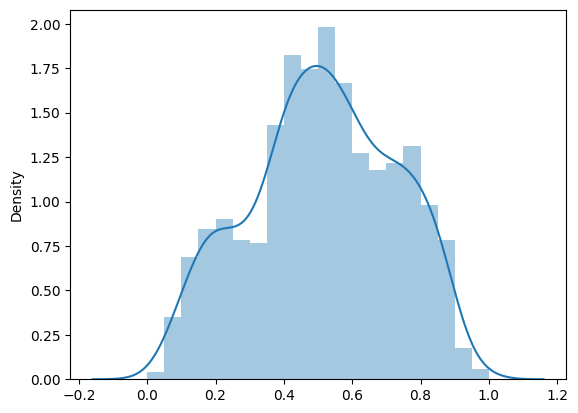

In [1070]:
fig = plt.figure()
sns.distplot((y_train,y_train_cnt),bins=20)

In [1071]:
df_test[var]= scaler.transform(df_test[var])
df_test

,yr,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
184,0,1,0,2,0.831783,0.657364,0.084219,0.933557,0.427086,0.692706,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,1,0.901354,0.610133,0.153728,0.265163,0.767976,0.712034,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,2,0.511964,0.837699,0.334206,0.072539,0.346376,0.303382,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,1,0.881625,0.437098,0.339570,0.268820,0.559630,0.547400,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,1,0.817246,0.314298,0.537414,0.223712,0.608143,0.569029,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,2,0.257562,0.708888,0.287411,0.096312,0.376697,0.336516,...,0,0,0,0,0,0,1,0,0,0
702,1,0,1,1,0.519232,0.756118,0.283397,0.167327,0.871354,0.757478,...,0,0,0,0,0,0,0,0,1,0
127,0,0,0,1,0.584649,0.650923,0.069510,0.426394,0.420445,0.495973,...,1,0,0,0,0,0,1,0,0,0
640,1,0,1,2,0.745598,0.817947,0.052115,0.221274,0.985273,0.868615,...,0,0,1,0,0,0,0,0,0,1


In [1072]:
y_test= df_test.pop('cnt')
x_test = df_test.drop(['casual', 'registered',],axis = 1)

In [1073]:
x_test.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
184,0,1,0,2,0.831783,0.657364,0.084219,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,1,0.901354,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,2,0.511964,0.837699,0.334206,0,0,1,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,1,0.817246,0.314298,0.537414,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [1074]:
c = x_train_rfe2
x_test_rfe2 = x_test[col2]
x_test_rfe2 = sm.add_constant(x_test_rfe2)
x_test_rfe2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   holiday        219 non-null    int64  
 3   temp           219 non-null    float64
 4   hum            219 non-null    float64
 5   windspeed      219 non-null    float64
 6   season_Spring  219 non-null    int64  
 7   mnth_jul       219 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 15.4 KB


In [1075]:
print("Train shape:", x_train_rfe2.shape)
print("Test shape:", x_test_rfe2.shape)
print("\nTrain columns:\n", x_train_rfe2.columns)
print("\nTest columns:\n", x_test_rfe2.columns)


Train shape: (510, 8)
Test shape: (219, 8)

Train columns:
 Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'mnth_jul'],
      dtype='object')

Test columns:
 Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'mnth_jul'],
      dtype='object')


In [1076]:
x_train_rfe2.shape

(510, 8)

In [1077]:
y_pred =lm2.predict(x_test_rfe2)

In [1078]:
y_pred.shape

(219,)

In [1079]:
y_test.shape

(219,)

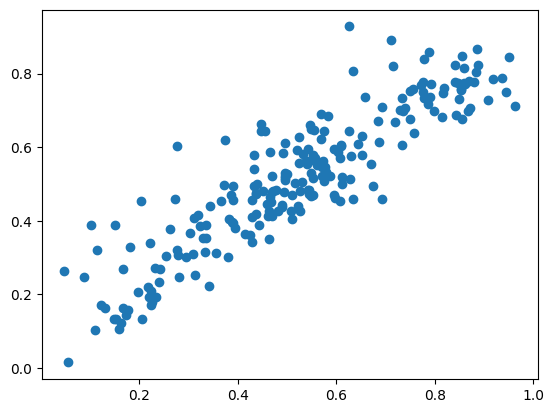

In [1080]:
plt.figure()
plt.scatter(y_test,y_pred)

In [1081]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8042490108043363

<Axes: >

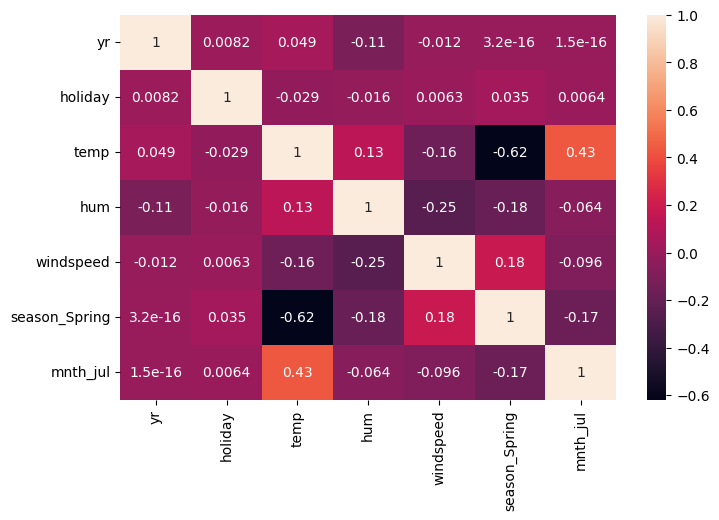

In [1082]:
plt.figure(figsize =(8,5))
sns.heatmap(dataset[col2].corr(),annot= True)